In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [5]:
moviesdf=pd.read_csv("movies.csv")
ratingdf=pd.read_csv("ratings.csv")
tagdf=pd.read_csv("tags.csv")
linkdf=pd.read_csv("links.csv")

## How many unique "userId" are available in "ratings.csv"?¶

In [6]:
df=ratingdf["userId"].unique()

In [7]:
len(df)

610

In [150]:
# df=pd.merge(df,df1)

In [151]:
# df.head()

In [8]:
# df = pd.concat([df, df1, vi,ad], axis=1, join='inner')
df1 = pd.merge(linkdf, moviesdf, on='movieId')
df2 = pd.merge(df1, ratingdf, on='movieId')
df = pd.merge(df2, tagdf, on='movieId')

In [9]:
df

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...,...,...
233208,187595,3778644,348350.0,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


## Which movie has recieved maximum number of user ratings?

In [13]:
e=ratingdf['movieId'].value_counts()

m=e.idxmax()

n=moviesdf[moviesdf['movieId']==m]
print(n['title'].tolist())

['Forrest Gump (1994)']


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [14]:
movie_name= "Matrix, The (1999)"
movie_id = moviesdf[moviesdf['title'] == movie_name]['movieId'].iloc[0]
T =tagdf[tagdf['movieId'] == movie_id]['tag']

In [15]:
print(T)

815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [17]:
name="Terminator 2: Judgment Day (1991)"

In [18]:
movies_df = pd.merge(ratingdf, moviesdf, on='movieId')

In [19]:
movies_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [20]:
ratings = movies_df[movies_df['title'] == name]['rating']
average_rating = ratings.mean()
print(f"The average user rating for '{name}' is: {average_rating}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.970982142857143


## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

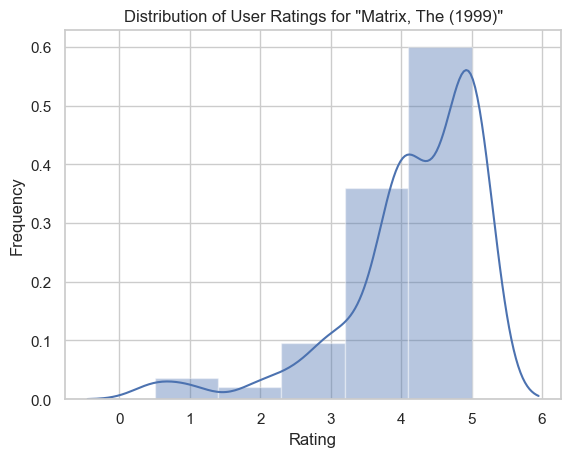

In [23]:
name="Fight Club (1999)"
ratings = movies_df[movies_df['title'] == movie_name]['rating']
sns.set(style="whitegrid")
sns.distplot(ratings, kde=True, bins=5)
plt.title(f'Distribution of User Ratings for "{movie_name}"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<!-- 🟢 IMPORTANT NOTE 1 🟢 -->

## 🟢 IMPORTANT NOTE 1 🟢


In [24]:
grouped = ratingdf.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped.columns = ['movieId', 'rating_count', 'rating_mean']

In [25]:
grouped_df = pd.merge(moviesdf, grouped, on='movieId', how='inner')
fdf = grouped_df[grouped_df['rating_count'] > 50]

## Which movie is the most popular based on average user ratings?

In [ ]:
# most_popular_movie = filtered_df[filtered_df['rating_mean'] == filtered_df['rating_mean'].max()]

In [26]:
popular_movie = fdf[fdf['rating_mean'] ==fdf['rating_mean'].max()]

In [28]:
print(popular_movie[['title', 'rating_mean']])

                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [33]:
sort = fdf.sort_values(by='rating_count', ascending=False)

In [34]:
print(sort[['title', 'rating_count']])

                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278
...                                ...           ...
3147                       Blow (2001)            51
3490               Training Day (2001)            51
3539           Mulholland Drive (2001)            51
118                    Bad Boys (1995)            51
1235       The Devil's Advocate (1997)            51

[436 rows x 2 columns]


## Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [35]:
fdf['genres'] = fdf['genres'].apply(lambda x: x.split("|"))

In [36]:
sdf = fdf[fdf['genres'].apply(lambda x: 'Sci-Fi' in x)]

In [37]:
sdf = sdf.sort_values(by='rating_count', ascending=False)

In [39]:
t_movie = sdf.iloc[2]
print(t_movie[['title', 'rating_count']])

The third most popular Sci-Fi movie based on the number of user ratings is:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


 ## IMPORTANT NOTE 2 

In [40]:
import requests
from bs4 import BeautifulSoup

In [61]:
def scrapper(imdbId):
    id = str(int(imdbId))
    z = 7 - len(id)
    d = "0" * z + id
    URL = f"https://www.imdb.com/title/tt{d}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'data-testid': 'ratingValue'})
    return {'imdb_id': imdbId, 'rating': imdb_rating.text if imdb_rating else np.nan}

In [45]:
fdf['imdb_data'] = fdf['movieId'].apply(scrapper)

In [46]:
fdf

,movieId,title,genres,rating_count,rating_mean,imdb_data
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930,"{'imdb_id': 1, 'rating': nan}"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818,"{'imdb_id': 2, 'rating': nan}"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615,"{'imdb_id': 3, 'rating': nan}"
5,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078,"{'imdb_id': 6, 'rating': nan}"
6,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185,"{'imdb_id': 7, 'rating': nan}"
...,...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667,"{'imdb_id': 106782, 'rating': nan}"
8354,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846,"{'imdb_id': 109374, 'rating': nan}"
8358,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,"{'imdb_id': 109487, 'rating': nan}"
8457,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847,"{'imdb_id': 112852, 'rating': nan}"


In [58]:
top_movie = fdf.loc[fdf['imdb_data'].apply(lambda x: float(x['rating']) if pd.notna(x['rating']) else 0).idxmax()]

In [59]:
top_movie

movieId                                                         1
title                                            Toy Story (1995)
genres          [Adventure, Animation, Children, Comedy, Fantasy]
rating_count                                                  215
rating_mean                                               3.92093
imdb_data                           {'imdb_id': 1, 'rating': nan}
Name: 0, dtype: object

In [60]:
print(top_movie[['movieId','title', 'imdb_data']])

movieId                                  1
title                     Toy Story (1995)
imdb_data    {'imdb_id': 1, 'rating': nan}
Name: 0, dtype: object


# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating?

In [52]:
df = fdf[fdf['genres'].apply(lambda x: 'Sci-Fi' in x)]

In [53]:
movie = df.loc[df['imdb_data'].apply(lambda x: float(x['rating']) if pd.notna(x['rating']) else 0).idxmax()]

In [57]:
(movie['movieId'])

32